In [6]:
import os  
import nltk  
from nltk.sentiment import SentimentIntensityAnalyzer  
import matplotlib.pyplot as plt
import seaborn as sns  

# Set up the sentiment analyzer  
# nltk.download("vader_lexicon")  
sid = SentimentIntensityAnalyzer()  
   
# Define the folder path  
output_folder = "output"  

folder_names = []  
positive_percentages = []  
negative_percentages = []  
neutral_percentages = [] 

# Iterate over each folder in the output folder  
for folder_name in os.listdir(output_folder):  
    folder_path = os.path.join(output_folder, folder_name)  
  
    # Initialize variables for total sentiment  
    total_positive = 0  
    total_negative = 0  
    total_neutral = 0  
    total_comments = 0  
  
    if os.path.isdir(folder_path):  
        print(f"===================================================")  
        print(f"Processing folder: {folder_name}\n")  
        folder_names.append(folder_name)  

        # Iterate over each file in the folder  
        for filename in os.listdir(folder_path):  
            if filename.endswith(".txt"):  
                file_path = os.path.join(folder_path, filename)  
                with open(file_path, "r") as f:  
                    comment_text = f.read()  
  
                # Calculate the sentiment polarity of the comment  
                sentiment_scores = sid.polarity_scores(comment_text)  
                sentiment = sentiment_scores["compound"]  
  
                # Add sentiment scores to the total  
                total_positive += sentiment_scores["pos"]  
                total_negative += sentiment_scores["neg"]  
                total_neutral += sentiment_scores["neu"]  
                total_comments += 1  
  
                print(f"{filename}: positive ({sentiment_scores['pos'] * 100:.2f}%)"  
                      f" negative ({sentiment_scores['neg'] * 100:.2f}%)"  
                      f" neutral ({sentiment_scores['neu'] * 100:.2f}%)")  
  
        # Calculate the average sentiment scores  
        avg_positive = total_positive / total_comments * 100  
        avg_negative = total_negative / total_comments * 100  
        avg_neutral = total_neutral / total_comments * 100  

        positive_percentages.append(avg_positive)  
        negative_percentages.append(avg_negative)  
        neutral_percentages.append(avg_neutral) 
  
        # Print the total sentiment for the folder  
        print(f">>> {folder_path}: positive ({avg_positive:.2f}%) negative ({avg_negative:.2f}%) neutral ({avg_neutral:.2f}%)\n\n")  

Processing folder: issue_27810

first_post.txt: positive (4.20%) negative (7.80%) neutral (88.10%)
comment_1.txt: positive (10.00%) negative (8.60%) neutral (81.30%)
>>> output/issue_27810: positive (7.10%) negative (8.20%) neutral (84.70%)


Processing folder: issue_27828

first_post.txt: positive (0.00%) negative (0.00%) neutral (100.00%)
comment_1.txt: positive (5.60%) negative (7.20%) neutral (87.20%)
>>> output/issue_27828: positive (2.80%) negative (3.60%) neutral (93.60%)


Processing folder: issue_27826

first_post.txt: positive (5.50%) negative (0.00%) neutral (94.50%)
comment_1.txt: positive (0.00%) negative (0.00%) neutral (100.00%)
comment_3.txt: positive (9.10%) negative (0.00%) neutral (90.90%)
comment_2.txt: positive (1.10%) negative (1.40%) neutral (97.40%)
>>> output/issue_27826: positive (3.92%) negative (0.35%) neutral (95.70%)


Processing folder: issue_27843

first_post.txt: positive (11.40%) negative (1.90%) neutral (86.60%)
>>> output/issue_27843: positive (11.40

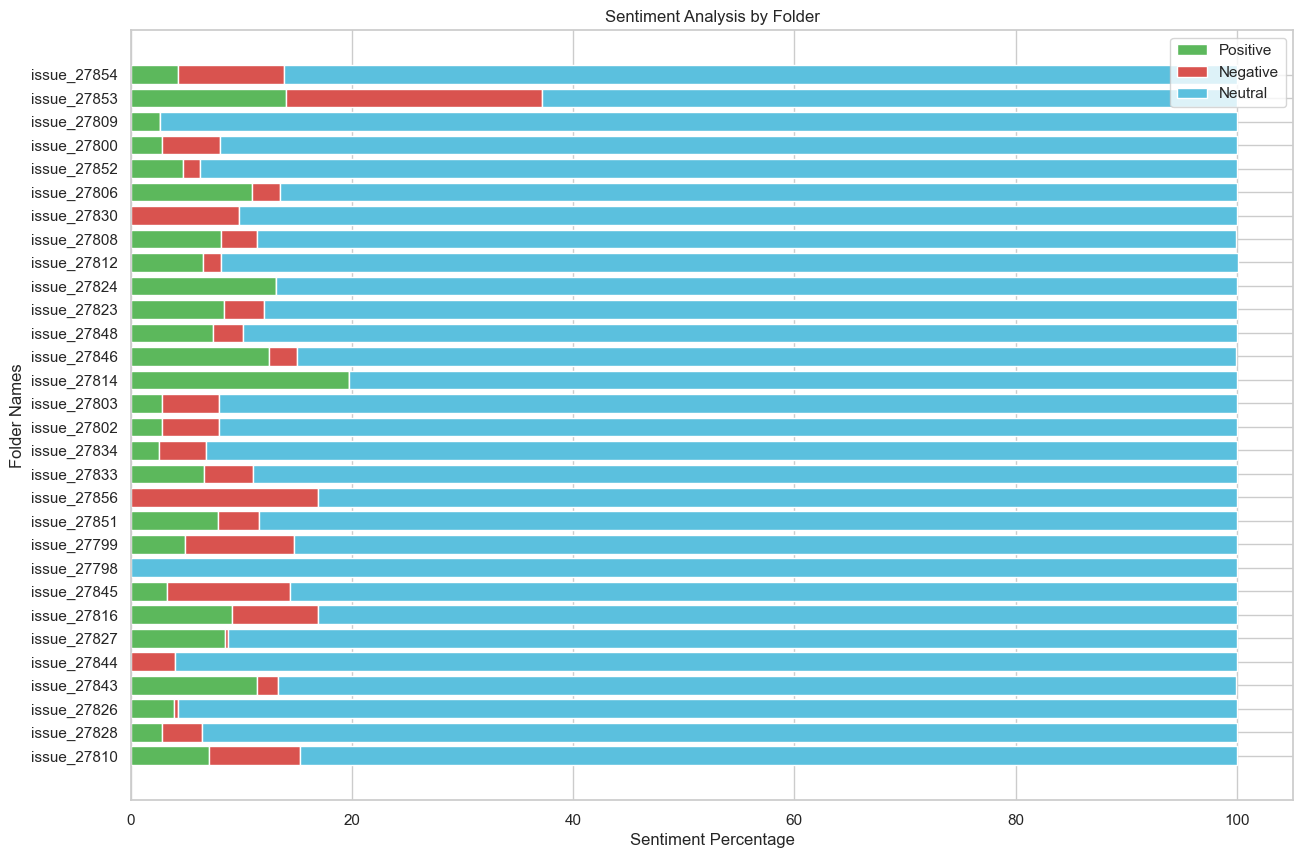

In [7]:

# Create the bar graph  
plt.figure(figsize=(15, 10))  
sns.set(style="whitegrid")  
  
bar_colors = ["#5cb85c", "#d9534f", "#5bc0de"]  
bar_labels = ["Positive", "Negative", "Neutral"]  
  
plt.barh(folder_names, positive_percentages, color=bar_colors[0], label=bar_labels[0])  
plt.barh(folder_names, negative_percentages, left=positive_percentages, color=bar_colors[1], label=bar_labels[1])  
plt.barh(folder_names, neutral_percentages, left=[i + j for i, j in zip(positive_percentages, negative_percentages)], color=bar_colors[2], label=bar_labels[2])  
  
plt.xlabel("Sentiment Percentage")  
plt.ylabel("Folder Names")  
plt.title("Sentiment Analysis by Folder")  
plt.legend(loc="upper right")  
  
plt.show()  